In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import seaborn as sns
import cv2

# Ecualizacion de Histogramas

In [99]:
img = cv2.imread('ecua2.jpg', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('ecua1.png', cv2.IMREAD_GRAYSCALE)

Reduccion de resolucion

(37, 55)

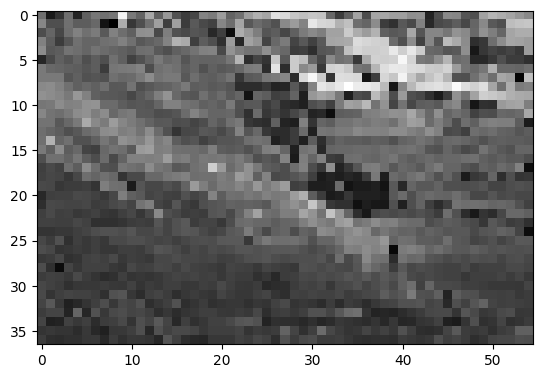

In [100]:
def pix_redux(image, x):
    m, n = image.shape
    m2 = m // x
    n2 = n // x
    new_size = np.zeros((m2, n2), dtype=image.dtype)
    for i in range(m2):
        for j in range(n2):
            new_size[i, j] = image[i * x, j * x]
    return new_size

img_redux = pix_redux(img, 9)
plt.imshow(img_redux, cmap='gray')
img_redux.shape

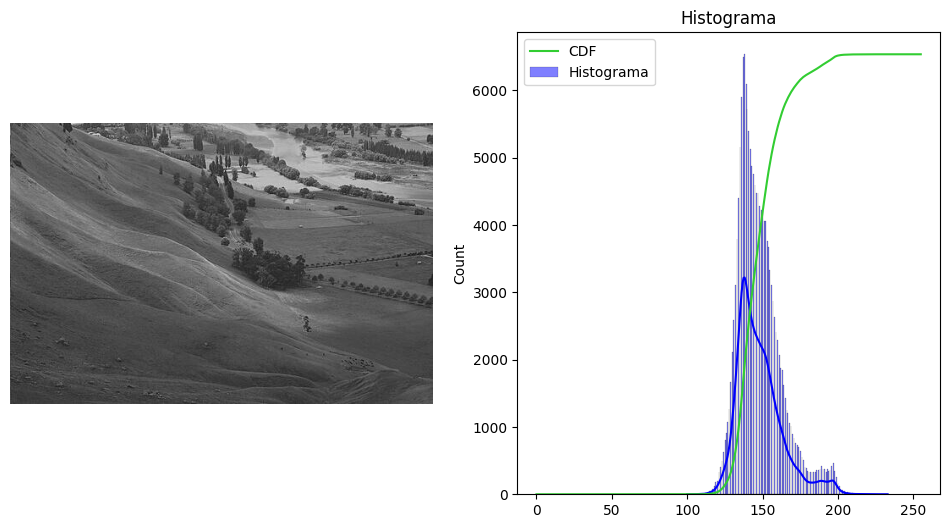

In [101]:
m, n = img.shape

hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_norm = cdf * float(hist.max()) / cdf.max()  

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
sns.histplot(img.ravel(), kde=True, bins=256, label='Histograma', color='blue')
plt.plot(bins[:-1], cdf_norm, color='limegreen', label='CDF')
plt.legend()
plt.title('Histograma')
plt.show()

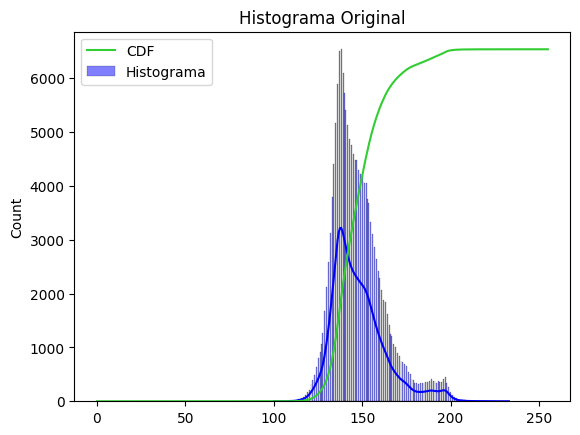

In [102]:
sns.histplot(img.ravel(), kde=True, bins=256, label='Histograma', color='blue')
plt.plot(bins[:-1], cdf_norm, color='limegreen', label='CDF')
plt.legend()
plt.title('Histograma Original')
plt.show()

In [103]:
# equ = cv2.equalizeHist(img)
# res = np.hstack((img,equ)) #stacking images side-by-side
# cv2.imwrite('res.png',res)

In [104]:
def ecualizar(img):
    flat = img.flatten()
    hist = np.bincount(flat, minlength=256)
    cdf = hist.cumsum()

    cdf_min = cdf[np.nonzero(cdf)].min()
    total_pixels = flat.size
    cdf_norm = np.round((cdf - cdf_min) * 255 / (total_pixels - cdf_min)).astype(np.uint8)
    ecu = cdf_norm[flat]
    ecu_img = ecu.reshape(img.shape)
    return ecu_img

ecualizada=ecualizar(img)
cv2.imwrite('res.png', ecualizada)

True

Text(0.5, 1.0, 'Imagen Ecualizada')

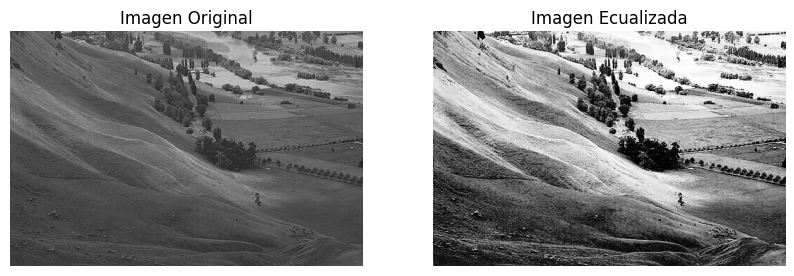

In [105]:
img2 = cv2.imread('res.png', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(ecualizada, cmap='gray')
plt.axis('off')
plt.title('Imagen Ecualizada')

Text(0.5, 1.0, 'Histograma Ecualizado')

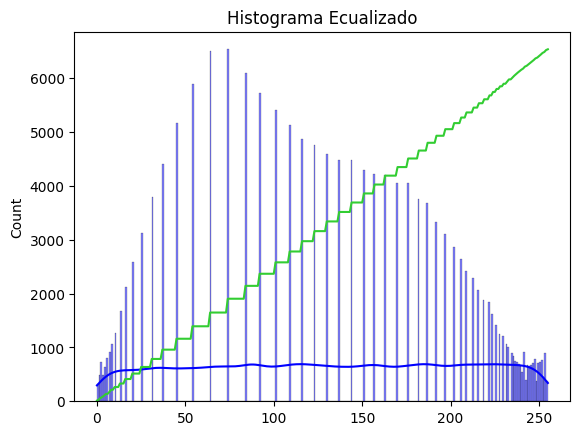

In [106]:
m, n = img2.shape

hist, bins = np.histogram(img2.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_norm = cdf * float(hist.max()) / cdf.max()
sns.histplot(img2.ravel(), kde=True, bins=256, label='Histograma', color='blue')
plt.plot(bins[:-1], cdf_norm, color='limegreen', label='CDF')
plt.title('Histograma Ecualizado')

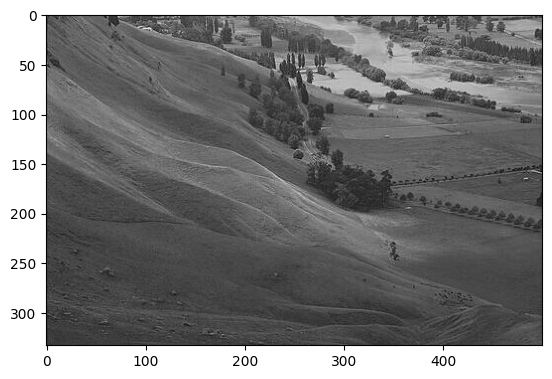

In [107]:
plt.imshow(img, cmap='gray')

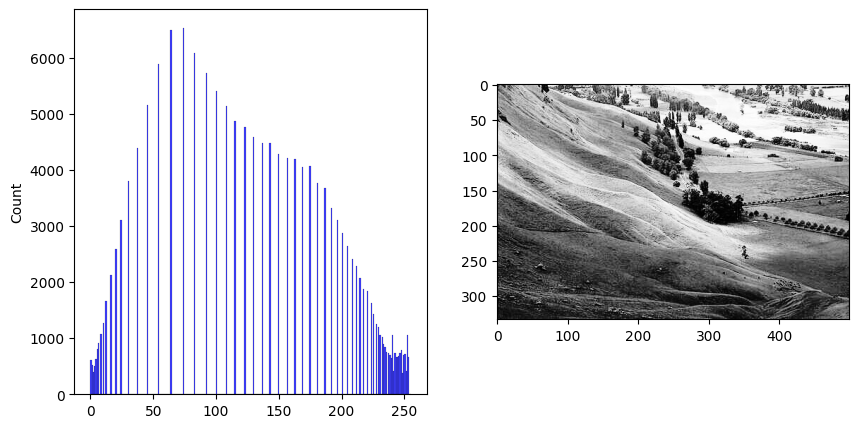

In [108]:
img_eq = ski.exposure.equalize_hist(img)
hist, bins = np.histogram(img_eq.ravel(), 256, [0, 256])
#cdf = hist.cumsum()
#cdf_norm = cdf * float(hist.max()) / cdf.max()
img_eq = (img_eq * 255).astype(np.uint8)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(img_eq.ravel(), kde=False, bins=256, label='Histograma', color='blue')
#plt.plot(bins[:-1], cdf_norm, color='limegreen', label='CDF')
plt.subplot(1,2,2)
plt.imshow(img_eq, cmap='gray')

# Expansion de Histograma